# Домашнее задание 5

## Задача 0.

1. Сгенерируйте NumPy-массив чисел от 0 до 10000 (включительно).
2. Найдите сумму всех чисел, кроме тех, которые делятся на 3 или на 8 (в одну строку).

In [52]:
import numpy as np
arr = np.arange(10001)
print(arr)
res = sum([x for x in arr if (x % 3 != 0 or x % 8 != 0)])
print(res)

[    0     1     2 ...  9998  9999 10000]
47923336


## Задача 1. Интерполяция

Уравнение движения маятника $y = A \cos{(\omega t + \varphi)}$

Есть измерянные данные (с шумом). 

Необходимо найти амплитуду, частоту и начальную фазу.

In [7]:
import numpy as np

In [8]:
t_data = np.linspace(0, 10, 30)
y_noisy = np.array([ 4.10465607,  1.69794745, -2.32313143, -4.07624211, -1.66543449,  2.1145771,
  3.70880127,  2.16805654, -2.04181849, -4.07636456, -1.83702696,  1.95313412,
  4.18439283,  1.95123149, -1.90018249, -3.88197156, -2.25644626,  1.58158325,
  4.08242668,  2.51835565, -1.27829727, -4.0866171, -2.30645672, 1.08053092,
  4.07574853,  2.79301888, -0.89299698, -3.91278811, -3.00365192,  0.792355  ])

𝐴 = 0.4000099310600133, 𝜔 = 0.8709499407580896, 𝜑 = 0.689283248365917


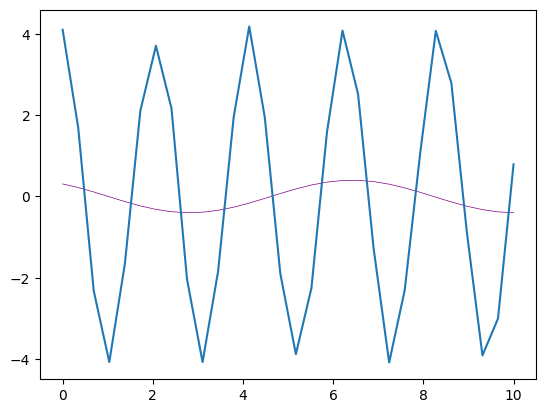

In [83]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(t, A, omega, phi):
  return A*np.cos(t*omega + phi)

popt, pcov = curve_fit(f, t_data, y_noisy)
res_A, res_omega, res_phi = popt
y_fit = f(t_data, res_A, res_omega, res_phi)

plt.plot(t_data, y_fit, color='purple', lw=0.5)
plt.plot(t_data, y_noisy)
print(f'𝐴 = {res_A}, 𝜔 = {res_omega}, 𝜑 = {res_phi}')

plt.show()

## Задача 2. Система Лоренца


$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>

В наших вычислениях используем стандартные значения $\sigma=10, \rho=28, \beta=2.667$

<br>

1. Построить хаотический аттрактор. Начальные данные $-$ $(0., 1., 1.05)$, первые 5000 точек решения отбросить ("переходный процесс"). Потом отрисовать траекторию, сформированную 10000 точками. Шаг по времени $\Delta t = 0.01$;
2. Аннотировать график и нанести начальные данные.

In [60]:
from scipy.integrate import odeint
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D


## Задача 3. 

Пусть $y = {\rm e}^{-\frac{x}{10}} \sin{x}$ и рассмотрим $10^4$ равноудаленных точек на интервале $[0, 10]$.

1. Постройте график зависимости $y$ от $x$;
2. Посчитайте среднее и среднеквадратическое отклонение $y$ при значениях $x \in [4, 7]$;
3. Для $x \in [4, 7]$ найдите значение $y_m$ такое, что $70\%$ значений $y$ меньше $y_m$. Обозначьте пунктирной прямой соответствующее значение на графике;
4. Найдите $y'(x)$ и постройте соответствующий график; 
5. Найдите экстремумы $y$ (т.е. решите $y'(x) = 0$). Нанесите найденные точки на график.

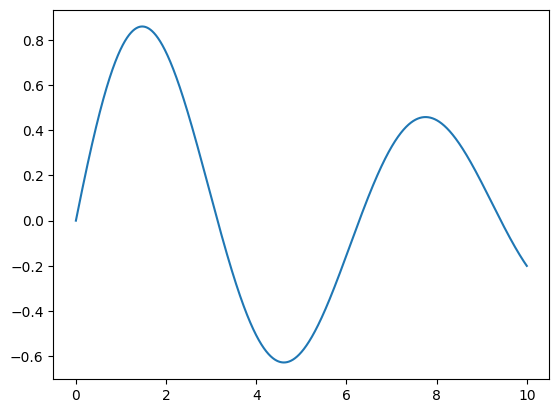

In [61]:
def f(x):
  return np.exp(-x/10) * np.sin(x)

x_values = np.linspace(0, 10, 10**4)
y_values = f(x_values)

plt.plot(x_values,y_values)

In [43]:
x_start_index, x_end_index = np.min(np.where(x_values >= 4)), np.max(np.where(x_values <= 7))
x_v= x_values[x_start_index:x_end_index]
y_v = y_values[x_start_index:x_end_index]
print('mean = ',np.mean(y_v))
print('standard deviation = ', np.std(y_v))

mean =  -0.29584361671077636
standard deviation =  0.31430057573893994


-0.0991903983567547


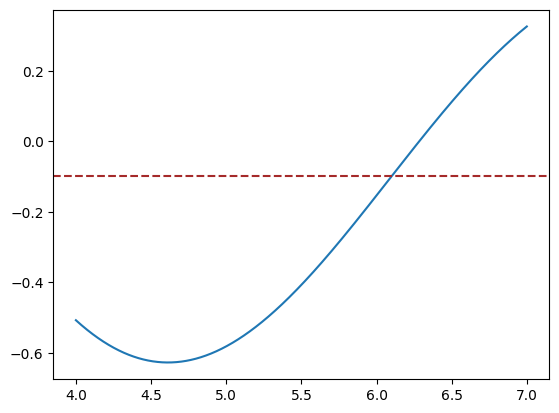

In [44]:
from matplotlib.pyplot import axhline
plt.plot(x_v, y_v)
svn_plc = int(len(y_v) * 0.7)
seventy_value = np.sort(y_v)[svn_plc]

print(seventy_value)

axhline(seventy_value,color='brown',linestyle='--')
plt.show()

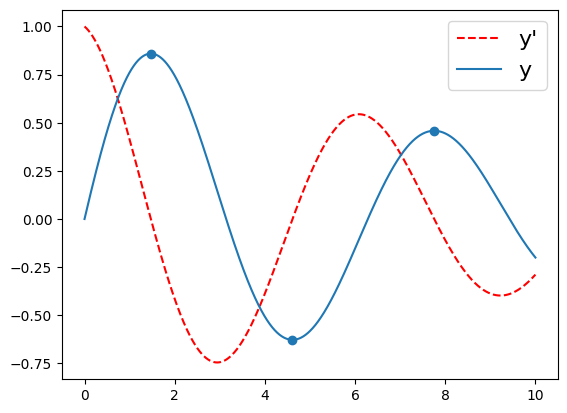

In [72]:

dx = x_values[1]-x_values[0]
dydx = np.gradient(y_values, dx)

plt.plot(x_values, dydx, color='red',linestyle='--', label='y\'')
plt.plot(x_values, y_values, label='y')
plt.legend(loc='best', fontsize=16)

ind = np.where(abs(dydx - 0) <= 0.22e-3)[0]
plt.scatter(x_values[ind], y_values[ind])

## Задача 4

Постройте <a href="https://en.wikipedia.org/wiki/Rose_(mathematics)">розочку</a>, заданную уравнением

$r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$ при $0 \leq \theta \leq 2 \pi$.

1. Найдите вектора $x$ и $y$ и постройте соответствующий график (добавьте легенды, аннотации и т.п.);
2. Найдите площадь, ограниченную фигурой, из формулы $S = \frac{1}{2} \int_{0}^{2\pi} r^2 d\theta$;
3. Найдите длину кривой из формулы $L = \int_{0}^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta})^2} d\theta$;

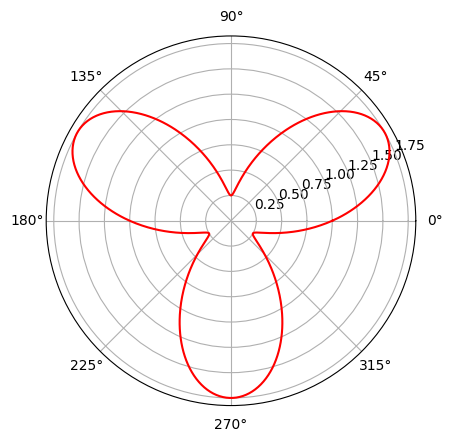

In [99]:
def r(teta):
  return 1 + 3/4*np.sin(3*teta)

def x(r, teta):
  return r*np.cos(teta)

def y(r, teta):
  return r*np.sin(teta)
teta_vals = np.linspace(0, 2*np.pi, 1000)
r_vals = r(teta_vals)

plt.polar(teta_vals, r_vals, color='red')

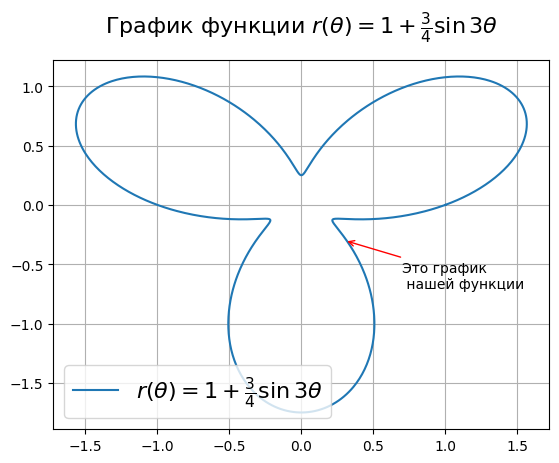

In [113]:
x_values = x(r_vals, teta_vals)
y_values = y(r_vals, teta_vals)

plt.plot(x_values, y_values, label=r'$r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$')
plt.legend(loc='best', fontsize=16)
plt.title(r'График функции $r(\theta) = 1 + \frac{3}{4}\sin{3\theta}$', fontsize=16, y=1.05)
plt.grid()

plt.annotate('Это график\n нашей функции', xy=(0.3, -0.3),
             xytext=(0.7, -0.7),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

In [121]:
from scipy.integrate import quad

def r_sqr(teta):
  return (1 + 3/4*np.sin(3*teta))**2
res, err = quad(r_sqr, 0, 2* np.pi)

res = 1/2 * res
print(res)

4.025165587411922


In [122]:
def L(teta):
    return np.sqrt((r_sqr(teta) + (9/4 * np.cos(3 * teta)) ** 2))

res, err = quad(L, 0, 2* np.pi)

print(res)

11.62498851875043


## Задача 5: Оптимизация

$x_{4}(x_{1} - x_{2} + x_{3}^2) + x_{3}(x_{1} - x_{4}) \rightarrow \inf_{x}$ при ограничениях

$
\begin{align}
x_{1}x_{2}x_{3}x_{4} &\geq 25 \\
x_{1}^2 + x_{2}^2 + x_{3}^2 + x_{4}^2 &= 40 \\
1 \leq x_{1}, x_{2}, x_{3}, x_{4} &\leq 5 \\
x_{0} &= (2, 4, 4, 2)
\end{align}
$

In [3]:
from scipy.optimize import minimize

f = lambda x: x[3]*(x[0] - x[1] + x[2]**2) + x[2]*(x[0] - x[3])

cons = ({'type': 'ineq', 'fun': lambda x: x[0]*x[1]*x[2]*x[3] - 25},
       {'type': 'eq', 'fun': lambda x: x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 - 40})

bounds = ((1, 5), (1, 5), (1, 5), (1, 5))

result = minimize(f, (2, 4, 4, 2), bounds=bounds, constraints=cons)
result

     fun: -11.73643474639995
     jac: array([ 5.16687751, -4.06674123,  6.10800648, -3.21783245])
 message: 'Optimization terminated successfully'
    nfev: 67
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([1.22680971, 4.55480554, 1.1001361 , 4.06674132])